# 01 - Seoul_Bike_Data

In [66]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
seouldata = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
seouldata.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [77]:
seouldata.isnull().any()

Date                     False
Rented_Bike_Count        False
Hour                     False
Temperature(°C)          False
Humidity                 False
Wind_speed               False
Visibility               False
Dew_point_temperature    False
Solar_Radiation          False
Rainfall                 False
Snowfall                 False
dtype: bool

# 02 - Identify what form of data : Master table

# 03 - Question : What parameters are impact bike rentals the most ?

In [84]:
seouldata.describe()
seouldata = seouldata.drop('Hour',axis=1)

In [86]:
seouldata.corr()

,Rented_Bike_Count,Temperature(°C),Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# 04 - Create a visulization to describe the data

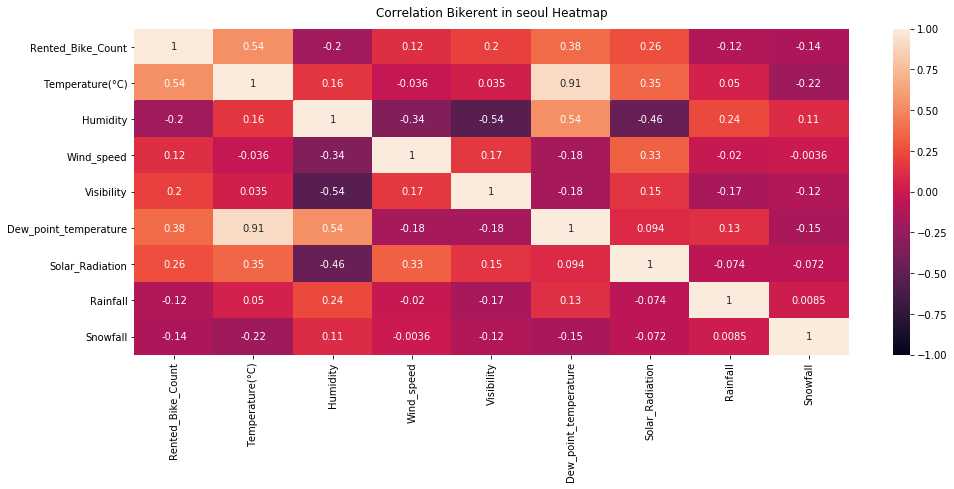

In [87]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(seouldata.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Bikerent in seoul Heatmap', fontdict={'fontsize':12}, pad=12);